In [1]:
from sklearn import datasets

In [ ]:
import numpy as np

iris = datasets.load_iris()

iris.data

In [3]:
X = iris.data[:, [2,3]]
y = iris.target

In [4]:
'Class labels', np.unique(y)

('Class labels', array([0, 1, 2]))

In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=1, stratify = y
)

We took the advabteage of stratificiation, it means that the train_test_split method below returns training and test subsets have the same proportions of class labels as input dataset.

In [8]:
print('Labels count in y:', np.bincount(y))

print('Labels count in y_train', np.bincount(y_train))
print('Labels count in y_train', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train [35 35 35]
Labels count in y_train [15 15 15]


Always standardize just as you did in Aurelien Geron's book

In [10]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

Using the fit method of Standard Scaler, the code estimated $ \mu $ and $ \sigma $ of the data we have.

Note that though we standardized TEST Set, with the SAME Parameters we use for train set.

In [14]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(eta0=.1, random_state = 1)

In [15]:
perceptron.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [16]:
y_pred = perceptron.predict(X_test_std)

print('Misclassified examples', (y_pred != y_test).sum())

Misclassified examples 1


In [19]:
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt

def plot_decision_regions(X,y, classifier, test_idx = None, res = .02):
    
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    
    # plot the decision surface
    
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, res), np.arange(x2_min, x2_max, res))
    print(xx1.shape)
    
    # For every point places in xx1 and xx2 array, first make them an array and use the classifer to predict label (which class they belong to) and use them with apppropriate color.
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=.3, cmap = cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.xlim(xx2.min(), xx2.max())
    
    # plot class examples
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha = .8,
            c = colors[idx],
            marker = markers[idx],
            label = f'Class {cl}',
            edgecolor = 'black'
        )
        
    if test_idx:
        X_test, y_tet = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0 ], X_test[:, 1], c = 'none', edgecolor = 'black', alpha = 1.0, linewidth=1, marker = 'o', s = 100, label = 'Test Set')

(258, 265)


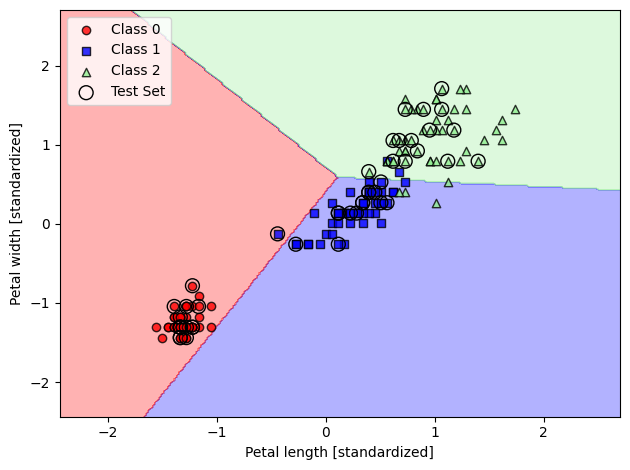

In [20]:
X_combined_std = np.vstack((X_train_std, X_test_std))

y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X = X_combined_std,
    y = y_combined,
    classifier = perceptron,
    test_idx = range(105,150)
)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Modeling class probabilities and conditional probabilities

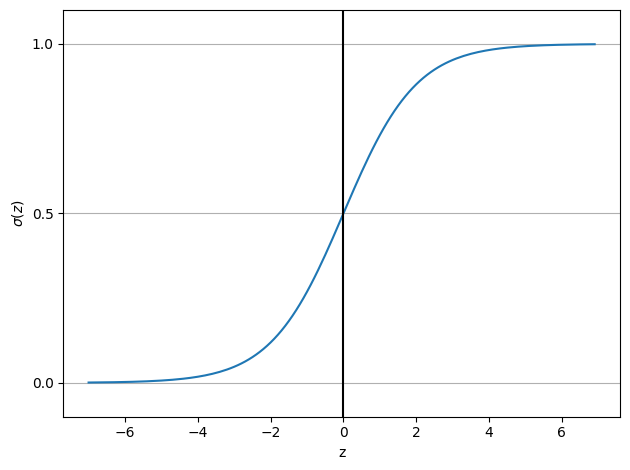

In [21]:

sigmoid = lambda z: 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7,7,.1)

sigmo_z = sigmoid(z)
plt.plot(z, sigmo_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


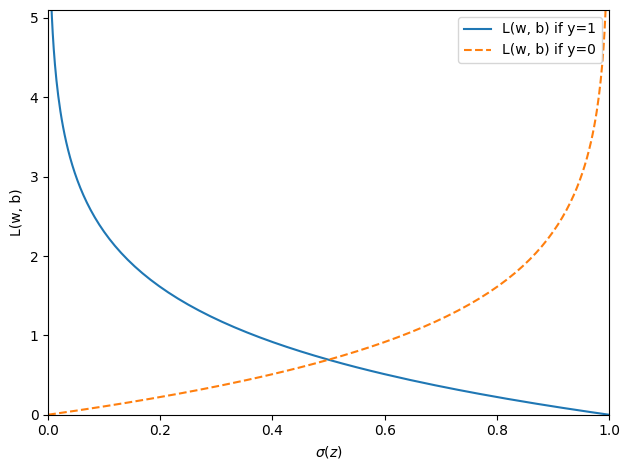

In [26]:
def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1-sigmoid(z))


z = np.arange(-10,10,.1)

sigma_z = sigmoid(z)

c1  = [(loss_1(x)) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()